In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from ssd import SSD
from ssd_utils import UnseenImagesGenerator, create_bbox_with_priors
from visual_util import render_above_threshold 

import json

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

np.set_printoptions(suppress=True)

Using TensorFlow backend.


In [2]:
def gen_fix(path, unseen_gen):
    images, filenames = next(unseen_gen)
    old_filenames = filenames
    for i, fname in enumerate(old_filenames):
        filenames[i] = path + "/" + fname
    return images, filenames

In [3]:
# some constants
NUM_CLASSES = 80
weight_load_num_classes = 80
target_size = (512, 512)
batch_size = 4

weight_path = '/home/joakim/projects/CensorML/weights/weights_512x512.hdf5'
unseen_path = 'pics'
with open('coco_labels.json', "r") as class_file:
    classes = json.load(class_file)

In [4]:
ssd = SSD(size=target_size, num_classes=weight_load_num_classes)
model = ssd.model
bbox_util = create_bbox_with_priors(model, NUM_CLASSES, target_size)

Found 6 images belonging to 2 classes.


In [5]:
ssd.model.load_weights(weight_path, by_name=True)

In [6]:
unseen_gen = UnseenImagesGenerator(directory=unseen_path, target_size=target_size, dim_ordering="tf", shuffle=False, batch_size=batch_size)

Found 6 images belonging to 2 classes.


In [11]:
images, filenames = gen_fix(unseen_path, unseen_gen)

In [12]:
preds = model.predict(images, batch_size=batch_size)
results = bbox_util.detection_out(preds)

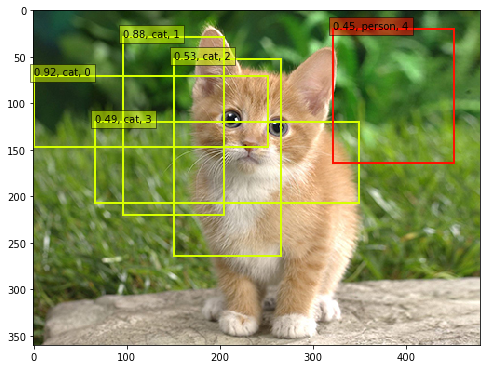

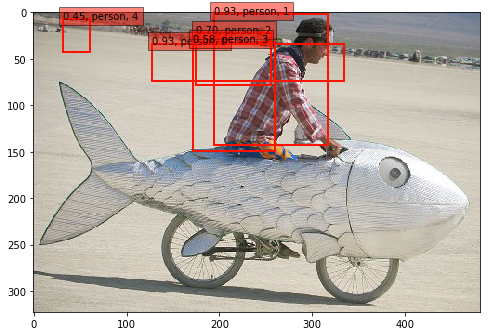

In [14]:
render_above_threshold(filenames, results, 0.4, classes)